# Kaggle Handle- tahfimjuwel

In [1]:
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import datetime as dt
from scipy.stats import mstats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [2]:
df=pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
unique_counts = df.nunique()
print(unique_counts)

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

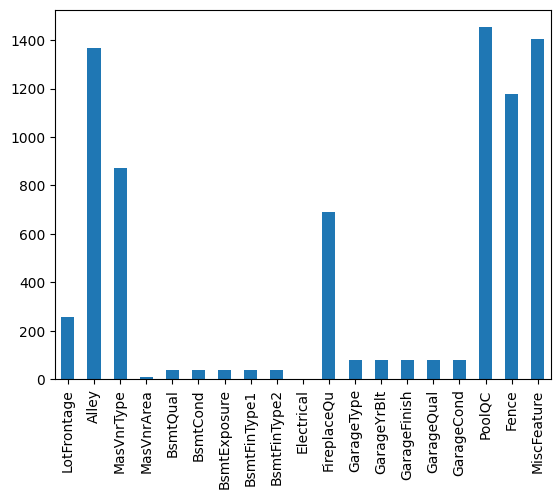

In [5]:
missing = df.isnull().sum()
missing=missing[missing>0]
missing.plot.bar()

In [6]:
df.drop(columns=['Id','Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [8]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [10]:
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])

In [11]:
nn = df.select_dtypes(include=[np.number])
nn.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
correlation = nn.corr()
correlation_with_target = correlation['SalePrice']

# Sort correlations in ascending order
correlation_sorted = correlation_with_target.sort_values()

# Display the sorted correlations
print(correlation_sorted)


KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.334901
BsmtFinSF1       0.386420
Fireplaces       0.466929
GarageYrBlt      0.470177
MasVnrArea       0.475241
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64


In [13]:
columns_to_drop = [
    'KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
    'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2', '3SsnPorch',
    'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr'
]

df = df.drop(columns=columns_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [14]:
df_train = df.copy()

In [15]:
df_test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
df_test.info()
test_ids = df_test['Id']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [16]:
df_test.drop(columns=['Id','Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

In [17]:
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mean())
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())
df_test['GarageCars'] = df_test['GarageCars'].fillna(df_test['GarageCars'].mean())
df_test['GarageArea'] = df_test['GarageArea'].fillna(df_test['GarageArea'].mean())
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean())
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mean())

In [18]:
columns_to_drop = [
    'KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
    'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2', '3SsnPorch',
    'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr'
]

df_test = df_test.drop(columns=columns_to_drop)


In [19]:
df_test['BsmtQual'] = df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['BsmtCond'] = df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['Electrical'] = df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])
df_test['GarageType'] = df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['GarageFinish'] = df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageQual'] = df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond'] = df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])
df_test['Utilities'] = df_test['Utilities'].fillna(df_test['Utilities'].mode()[0])
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])
df_test['Functional'] = df_test['Functional'].fillna(df_test['Functional'].mode()[0])
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1459 non-null   object 
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   object 
 4   LotShape       1459 non-null   object 
 5   LandContour    1459 non-null   object 
 6   Utilities      1459 non-null   object 
 7   LotConfig      1459 non-null   object 
 8   LandSlope      1459 non-null   object 
 9   Neighborhood   1459 non-null   object 
 10  Condition1     1459 non-null   object 
 11  Condition2     1459 non-null   object 
 12  BldgType       1459 non-null   object 
 13  HouseStyle     1459 non-null   object 
 14  OverallQual    1459 non-null   int64  
 15  YearBuilt      1459 non-null   int64  
 16  YearRemodAdd   1459 non-null   int64  
 17  RoofStyle      1459 non-null   object 
 18  RoofMatl

In [21]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_data = df[categorical_columns]
print("Categorical Columns:", categorical_columns.tolist())

Categorical Columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [22]:
df_test_copy = df_test.copy()

In [23]:
df_test.to_csv('Processed_test', index=False)

In [24]:
df_test_csv = pd.read_csv('/kaggle/working/Processed_test')

In [25]:
df_test_csv.shape

(1459, 60)

In [26]:
df_train['is_train'] = 1
df_test['is_train'] = 0 
final_df = pd.concat([df_test,df_train],axis=0)

In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       2919 non-null   object 
 1   LotFrontage    2919 non-null   float64
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   object 
 4   LotShape       2919 non-null   object 
 5   LandContour    2919 non-null   object 
 6   Utilities      2919 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandSlope      2919 non-null   object 
 9   Neighborhood   2919 non-null   object 
 10  Condition1     2919 non-null   object 
 11  Condition2     2919 non-null   object 
 12  BldgType       2919 non-null   object 
 13  HouseStyle     2919 non-null   object 
 14  OverallQual    2919 non-null   int64  
 15  YearBuilt      2919 non-null   int64  
 16  YearRemodAdd   2919 non-null   int64  
 17  RoofStyle      2919 non-null   object 
 18  RoofMatl     

In [28]:
categorical_columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
                       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
                       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 
                       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
                       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

# Apply one-hot encoding
final_df_encoded = pd.get_dummies(final_df, columns=categorical_columns, drop_first=True)


In [29]:
# Split back into train and test data
train_encoded = final_df_encoded[final_df_encoded['is_train'] == 1].drop(columns=['is_train'])
test_encoded = final_df_encoded[final_df_encoded['is_train'] == 0].drop(columns=['is_train'])


In [30]:
train_encoded.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,2003,2003,196.0,706.0,150.0,856.0,856,...,False,False,False,False,True,False,False,False,True,False
1,80.0,9600,6,1976,1976,0.0,978.0,284.0,1262.0,1262,...,False,False,False,False,True,False,False,False,True,False
2,68.0,11250,7,2001,2002,162.0,486.0,434.0,920.0,920,...,False,False,False,False,True,False,False,False,True,False
3,60.0,9550,7,1915,1970,0.0,216.0,540.0,756.0,961,...,False,False,False,False,True,False,False,False,False,False
4,84.0,14260,8,2000,2000,350.0,655.0,490.0,1145.0,1145,...,False,False,False,False,True,False,False,False,True,False


In [31]:
# Compute the correlation matrix
cf = train_encoded.corr()

# Extract correlations with the target variable 'SalePrice'
correlation_with_target = cf['SalePrice']

# Identify columns to drop (absolute correlation < 0.2)
columns_to_drop = correlation_with_target[correlation_with_target.abs() < 0.2].index

# Print the names of the dropped columns
print("Dropped columns:", list(columns_to_drop))

# Drop the identified columns from the dataset
#train_encoded_filtered = train_encoded.drop(columns=columns_to_drop)

# Display the remaining columns
#print("Remaining columns:", train_encoded_filtered.columns)



Dropped columns: ['MSZoning_FV', 'MSZoning_RH', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_P

In [32]:
train_encoded.shape

(1460, 220)

In [33]:
droped_col = ['MSZoning_FV', 'MSZoning_RH', 'Street_Pave', 'LotShape_IR3', 'LandContour_Low', 
              'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3', 
              'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 
              'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 
              'Neighborhood_Gilbert', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 
              'Neighborhood_NWAmes', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 
              'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 
              'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 
              'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 
              'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Twnhs', 
              'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 
              'HouseStyle_2.5Unf', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gambrel', 
              'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 
              'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'Exterior1st_AsphShn', 
              'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 
              'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_Plywood', 
              'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_WdShing', 
              'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 
              'Exterior2nd_CBlock', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 
              'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 
              'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'ExterCond_Gd', 'ExterCond_Po', 
              'Foundation_Stone', 'Foundation_Wood', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA', 
              'BsmtExposure_Mn', 'BsmtFinType1_LwQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 
              'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Heating_GasA', 
              'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Po', 
              'Electrical_FuseP', 'Electrical_Mix', 'Functional_Maj2', 'Functional_Min1', 
              'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'GarageType_Basment', 
              'GarageType_CarPort', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 
              'GarageCond_Gd', 'GarageCond_Po', 'PavedDrive_P', 'SaleType_CWD', 'SaleType_Con', 
              'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth', 
              'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family']

In [34]:
#test_encoded_filtered = test_encoded.drop(columns=droped_col)

In [35]:
test_encoded.shape

(1459, 220)

In [36]:
correlation_with_target = train_encoded.corr()['SalePrice']
print(correlation_with_target)


LotFrontage              0.334901
LotArea                  0.263843
OverallQual              0.790982
YearBuilt                0.522897
YearRemodAdd             0.507101
                           ...   
SaleCondition_AdjLand   -0.050686
SaleCondition_Alloca    -0.015525
SaleCondition_Family    -0.046480
SaleCondition_Normal    -0.153990
SaleCondition_Partial    0.352060
Name: SalePrice, Length: 220, dtype: float64


In [37]:
# Assuming the target variable is named 'SalePrice'
X_train = train_encoded.drop(columns=['SalePrice'])
y_train = train_encoded['SalePrice']

#X_test = test_encoded.reindex(columns=X_train.columns, fill_value=0)
X_test = test_encoded.drop(columns=['SalePrice'], errors='ignore')  # Ensure no error if SalePrice isn't in test data



In [38]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model

In [39]:
# Fit a linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Predict and evaluate on training data
y_train_pred = model_lr.predict(X_train_scaled)
print(f"Training RMSE (Linear Regression): {mean_squared_error(y_train, y_train_pred, squared=False)}")

Training RMSE (Linear Regression): 21752.035482284344


# Ridge Model

In [40]:
from sklearn.linear_model import Ridge
model_r = Ridge(alpha=0.01)  # Adjust alpha to control regularization strength

model_r.fit(X_train_scaled, y_train)

# Predict and evaluate on training data
y_train_pred = model_r.predict(X_train_scaled)
print(f"Training RMSE (Ridge): {mean_squared_error(y_train, y_train_pred, squared=False)}")


Training RMSE (Ridge): 21697.331345920495


# Lasso Model

In [41]:
model_l = Lasso(alpha=0.1, max_iter=5000)  # Adjust alpha to control regularization strength

model_l.fit(X_train_scaled, y_train)

# Predict and evaluate on training data
y_train_pred = model_l.predict(X_train_scaled)
print(f"Training RMSE (Lasso): {mean_squared_error(y_train, y_train_pred, squared=False)}")


Training RMSE (Lasso): 21697.332063562102


lasso = Lasso(alpha=0.01, max_iter=500000)  # Tune alpha using GridSearchCV
lasso.fit(X_train_scaled, y_train)
lasso_score = cross_val_score(lasso, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
print("Lasso RMSE:", (-lasso_score.mean()) ** 0.5)


# Elastic Net

In [42]:
model_e = ElasticNet(alpha=0.01, l1_ratio=0.9, max_iter=5000)
model_e.fit(X_train_scaled, y_train)

# Predict and evaluate on training data
y_train_pred = model_e.predict(X_train_scaled)
print(f"Training RMSE (Elastic Net): {mean_squared_error(y_train, y_train_pred, squared=False)}")


Training RMSE (Elastic Net): 21742.678868208794


# Random Forest Regressor

In [43]:
model_rf = RandomForestRegressor(n_estimators=1000, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Predict and evaluate on training data
y_train_pred = model_rf.predict(X_train_scaled)
print(f"Training RMSE (Random Forest Regressor): {mean_squared_error(y_train, y_train_pred, squared=False)}")

Training RMSE (Random Forest Regressor): 10849.364969449794


In [44]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Evaluate using cross-validation
from sklearn.model_selection import cross_val_score
rf_score = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Random Forest RMSE:", (-rf_score.mean()) ** 0.5)

Random Forest RMSE: 30053.3016651596


# XGB Regressor

In [45]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=6000, learning_rate=0.05, max_depth=5, random_state=42)
model_xgb.fit(X_train_scaled, y_train)

# Predict and evaluate on training data
y_train_pred = model_xgb.predict(X_train_scaled)
print(f"Training RMSE (XGB Regressor): {mean_squared_error(y_train, y_train_pred, squared=False)}")

Training RMSE (XGB Regressor): 138.8038110485944


# LGBM Regressor

In [46]:
from lightgbm import LGBMRegressor

model_lgb = LGBMRegressor(n_estimators=5000, learning_rate=0.05, random_state=42)
model_lgb.fit(X_train_scaled, y_train)

# Predict and evaluate on training data
y_train_pred = model_lgb.predict(X_train_scaled)
print(f"Training RMSE (LGBM Regressor): {mean_squared_error(y_train, y_train_pred, squared=False)}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3193
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 143
[LightGBM] [Info] Start training from score 180921.195890
Training RMSE (LGBM Regressor): 139.83481970320565


# SVM

In [47]:
from sklearn.svm import SVR

model_svm = svm = SVR(kernel='rbf', C=1, epsilon=0.1)
model_svm.fit(X_train_scaled, y_train)

# Predict and evaluate on training data
y_train_pred = model_svm.predict(X_train_scaled)
print(f"Training RMSE (SVM): {mean_squared_error(y_train, y_train_pred, squared=False)}")

Training RMSE (SVM): 81378.25403501045


In [48]:
test_predictions = model_rf.predict(X_test_scaled)

In [49]:
# Create a submission DataFrame
submission_rf= pd.DataFrame({
    'Id': test_ids,
    'SalePrice': test_predictions
})

# Save to CSV
submission_rf.to_csv('submission_rf.csv', index=False)

print("Submission file created: 'submission1.csv'")

Submission file created: 'submission1.csv'
